In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.cluster.hierarchy as sch
from sklearn.cluster import KMeans

In [2]:
crime=pd.read_csv(r'C:\Users\bivin\OneDrive\Desktop\crime_data.csv')
crime

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [5]:
crime=crime.rename({'Unnamed: 0':'state'},axis=1)
crime

,state,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


# KMEANS

In [6]:
#standardizing the data
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [14]:
st=sc.fit_transform(crime.iloc[:,1:])
st

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

In [15]:
## transforming the dataset to normalized
from sklearn.preprocessing import MinMaxScaler
mm=MinMaxScaler()
norm=mm.fit_transform(crime.iloc[:,1:])
norm

array([[0.74698795, 0.65410959, 0.44067797, 0.35917313],
       [0.55421687, 0.74657534, 0.27118644, 0.96124031],
       [0.43975904, 0.85273973, 0.81355932, 0.6124031 ],
       [0.48192771, 0.49657534, 0.30508475, 0.31524548],
       [0.4939759 , 0.79109589, 1.        , 0.86046512],
       [0.42771084, 0.54452055, 0.77966102, 0.81136951],
       [0.15060241, 0.22260274, 0.76271186, 0.09819121],
       [0.30722892, 0.6609589 , 0.6779661 , 0.21963824],
       [0.87951807, 0.99315068, 0.81355932, 0.63565891],
       [1.        , 0.56849315, 0.47457627, 0.47803618],
       [0.27108434, 0.00342466, 0.86440678, 0.33333333],
       [0.10843373, 0.25684932, 0.37288136, 0.17829457],
       [0.57831325, 0.69863014, 0.86440678, 0.43152455],
       [0.38554217, 0.23287671, 0.55932203, 0.35400517],
       [0.08433735, 0.03767123, 0.42372881, 0.10335917],
       [0.31325301, 0.23972603, 0.57627119, 0.27648579],
       [0.53614458, 0.21917808, 0.33898305, 0.23255814],
       [0.87951807, 0.69863014,

In [23]:
km=KMeans()

In [29]:
import warnings
warnings.filterwarnings('ignore')

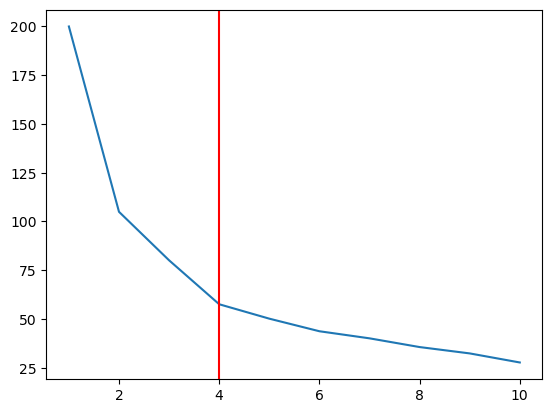

In [34]:
# plotting the elbow graph to find the optimum number of clusters
wcss=[]

for i in range(1,11):
    km=KMeans(n_clusters=i)
    km.fit_predict(st)
    wcss.append(km.inertia_)
    
plt.plot(range(1,11),wcss)
plt.axvline(x=4,color='red')

#### from the above plot the optimum number of cluster are 4


In [41]:
# build a cluster model with no:of cluster =5
km=KMeans(n_clusters=4)

In [42]:
predict1=km.fit_predict(st)
predict1
# predictions for standardized data

array([2, 0, 0, 2, 0, 0, 3, 3, 0, 2, 3, 1, 0, 3, 1, 3, 1, 2, 1, 0, 3, 0,
       1, 2, 0, 1, 1, 0, 1, 3, 0, 0, 2, 1, 3, 3, 3, 3, 3, 2, 1, 2, 0, 3,
       1, 3, 3, 1, 1, 3])

In [43]:
predict2=km.fit_predict(norm)
predict2
#predictions for normalized data

array([1, 2, 2, 1, 2, 2, 3, 3, 2, 1, 3, 0, 2, 3, 0, 3, 0, 1, 0, 2, 3, 2,
       0, 1, 2, 0, 0, 2, 0, 3, 2, 2, 1, 0, 3, 3, 3, 3, 3, 1, 0, 1, 2, 3,
       0, 3, 3, 0, 0, 3])

In [46]:
crime['cluster STD']=predict1
crime['cluster NORM']=predict2
crime

,state,Murder,Assault,UrbanPop,Rape,cluster STD,cluster NORM
0,Alabama,13.2,236,58,21.2,2,1
1,Alaska,10.0,263,48,44.5,0,2
2,Arizona,8.1,294,80,31.0,0,2
3,Arkansas,8.8,190,50,19.5,2,1
4,California,9.0,276,91,40.6,0,2
5,Colorado,7.9,204,78,38.7,0,2
6,Connecticut,3.3,110,77,11.1,3,3
7,Delaware,5.9,238,72,15.8,3,3
8,Florida,15.4,335,80,31.9,0,2
9,Georgia,17.4,211,60,25.8,2,1


In [47]:
## analysing the clusters
crime.groupby('cluster STD').agg('mean')

,Murder,Assault,UrbanPop,Rape,cluster NORM
cluster STD,,,,,
0,10.815385,257.384615,76.000000,33.192308,2.0
1,3.600000,78.538462,52.076923,12.176923,0.0
2,13.937500,243.625000,53.750000,21.412500,1.0
3,5.656250,138.875000,73.875000,18.781250,3.0


In [48]:
crime.groupby('cluster NORM').agg('mean')

,Murder,Assault,UrbanPop,Rape,cluster STD
cluster NORM,,,,,
0,3.600000,78.538462,52.076923,12.176923,1.0
1,13.937500,243.625000,53.750000,21.412500,2.0
2,10.815385,257.384615,76.000000,33.192308,0.0
3,5.656250,138.875000,73.875000,18.781250,3.0


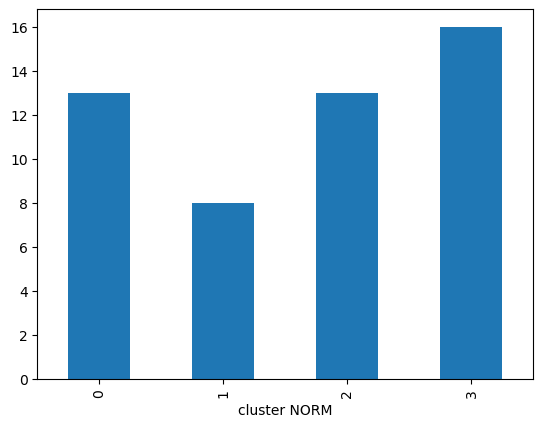

In [54]:
crime.groupby(['cluster NORM']).count()['state'].plot(kind='bar')
plt.show()

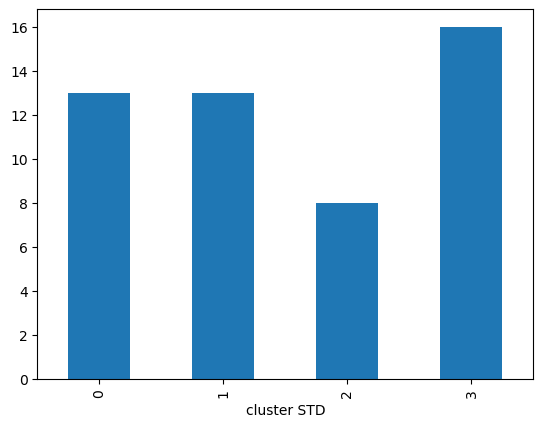

In [51]:
crime.groupby(['cluster STD']).count()['state'].plot(kind='bar')
plt.show()

In [55]:
# states in cluster 0
crime[crime['cluster NORM']==0]

,state,Murder,Assault,UrbanPop,Rape,cluster STD,cluster NORM
11,Idaho,2.6,120,54,14.2,1,0
14,Iowa,2.2,56,57,11.3,1,0
16,Kentucky,9.7,109,52,16.3,1,0
18,Maine,2.1,83,51,7.8,1,0
22,Minnesota,2.7,72,66,14.9,1,0
25,Montana,6.0,109,53,16.4,1,0
26,Nebraska,4.3,102,62,16.5,1,0
28,New Hampshire,2.1,57,56,9.5,1,0
33,North Dakota,0.8,45,44,7.3,1,0
40,South Dakota,3.8,86,45,12.8,1,0


In [56]:
# states in cluster 1
crime[crime['cluster NORM']==1]

,state,Murder,Assault,UrbanPop,Rape,cluster STD,cluster NORM
0,Alabama,13.2,236,58,21.2,2,1
3,Arkansas,8.8,190,50,19.5,2,1
9,Georgia,17.4,211,60,25.8,2,1
17,Louisiana,15.4,249,66,22.2,2,1
23,Mississippi,16.1,259,44,17.1,2,1
32,North Carolina,13.0,337,45,16.1,2,1
39,South Carolina,14.4,279,48,22.5,2,1
41,Tennessee,13.2,188,59,26.9,2,1


In [57]:
# states in cluster 2
crime[crime['cluster NORM']==2]

,state,Murder,Assault,UrbanPop,Rape,cluster STD,cluster NORM
1,Alaska,10.0,263,48,44.5,0,2
2,Arizona,8.1,294,80,31.0,0,2
4,California,9.0,276,91,40.6,0,2
5,Colorado,7.9,204,78,38.7,0,2
8,Florida,15.4,335,80,31.9,0,2
12,Illinois,10.4,249,83,24.0,0,2
19,Maryland,11.3,300,67,27.8,0,2
21,Michigan,12.1,255,74,35.1,0,2
24,Missouri,9.0,178,70,28.2,0,2
27,Nevada,12.2,252,81,46.0,0,2


In [58]:
# states in cluster 3
crime[crime['cluster NORM']==3]

,state,Murder,Assault,UrbanPop,Rape,cluster STD,cluster NORM
6,Connecticut,3.3,110,77,11.1,3,3
7,Delaware,5.9,238,72,15.8,3,3
10,Hawaii,5.3,46,83,20.2,3,3
13,Indiana,7.2,113,65,21.0,3,3
15,Kansas,6.0,115,66,18.0,3,3
20,Massachusetts,4.4,149,85,16.3,3,3
29,New Jersey,7.4,159,89,18.8,3,3
34,Ohio,7.3,120,75,21.4,3,3
35,Oklahoma,6.6,151,68,20.0,3,3
36,Oregon,4.9,159,67,29.3,3,3
